In [76]:
# import nwhy
import hypernetx as hnx
import networkx as nx
from networkx import Graph
import os
import numpy as np
import csv
import pickle
import re

In [2]:
path = r'./archive'

In [3]:
print(os.listdir(path))

['ArticlesFeb2017.csv', 'CommentsFeb2018.csv', 'ArticlesApril2017.csv', 'CommentsApril2018.csv', 'ArticlesMarch2018.csv', 'CommentsMarch2017.csv', 'ArticlesMay2017.csv', 'ArticlesJan2017.csv', 'CommentsJan2018.csv', 'CommentsMarch2018.csv', 'ArticlesJan2018.csv', 'CommentsMay2017.csv', 'CommentsJan2017.csv', 'ArticlesMarch2017.csv', 'CommentsApril2017.csv', 'ArticlesFeb2018.csv', 'CommentsFeb2017.csv', 'ArticlesApril2018.csv']


In [4]:
paths_articles = []
paths_comments = []

articles_file_path_jan = path + '/' +'ArticlesJan2018.csv'
paths_articles.append(articles_file_path_jan)
comments_file_path_jan = path + '/' + 'CommentsJan2018.csv'
paths_comments.append(comments_file_path_jan)

articles_file_path_feb = path + '/' +'ArticlesFeb2018.csv'
paths_articles.append(articles_file_path_feb)
comments_file_path_feb = path + '/' + 'CommentsFeb2018.csv'
paths_comments.append(comments_file_path_feb)


articles_file_path_march = path + '/' +'ArticlesMarch2018.csv'
paths_articles.append(articles_file_path_march)
comments_file_path_march = path + '/' + 'CommentsMarch2018.csv'
paths_comments.append(comments_file_path_march)

articles_file_path_april = path + '/' +'ArticlesApril2018.csv'
# paths_articles.append(articles_file_path_april)
comments_file_path_april = path + '/' + 'CommentsApril2018.csv'
# paths_comments.append(comments_file_path_april)

print(paths_articles)
print(paths_comments)

['./archive/ArticlesJan2018.csv', './archive/ArticlesFeb2018.csv', './archive/ArticlesMarch2018.csv']
['./archive/CommentsJan2018.csv', './archive/CommentsFeb2018.csv', './archive/CommentsMarch2018.csv']


In [5]:
def createDictionary(array_of_dictionaries):
    dictionary = array_of_dictionaries[0]
    for i in range(1, len(array_of_dictionaries)):
        dictionary.update(array_of_dictionaries[i])
    return dictionary
        

In [6]:
articles  = {}
count = 0
for articles_file_path in paths_articles:

    with open(articles_file_path, "r",encoding="utf-8",newline="") as f:
        csv_reader = csv.reader(f, delimiter=",")
        header = next(csv_reader)
        record = [{field:None} for field in header]
        index = 0
        for i,item in enumerate(record):
            if(list(item.keys())[0]) == "articleID":
                index =i
        for row in csv_reader:
            record = [{field:None} for field in header]
            for i, item in enumerate(row):
                record[i][list(record[i].keys())[0]] = item
            articles[row[index]]= createDictionary(record)
            count += 1
print(count)
print(len(articles))

3445
3445


In [7]:
files = os.listdir()
if not "articles.pickle" in files:
    with open('articles.pickle', 'wb') as f:
        print("dumping articles into articles.pickle....")
        pickle.dump(articles, f)
else:
    with open("articles.pickle", "rb") as f:
        print("loaded articles from articles.pickle..")
        articles = pickle.load(f)
print(len(articles))


loaded articles from articles.pickle..
3445


In [8]:
count = 0
for ID in articles:
    print(ID)
    print(articles[ID])
    count +=1
    if count==5:
        break
    

5a7101c110f40f00018be961
{'abstract': '', 'articleID': '5a7101c110f40f00018be961', 'articleWordCount': '1322', 'byline': 'By SHANNON SIMS', 'documentType': 'article', 'headline': 'Rhythm of the Streets: ‘We’re Warrior Women, and Yes, We Can Play’', 'keywords': "['Bahia (Brazil)', 'Music', 'Women and Girls', 'Banda Dida (Music Group)', 'Drums', 'Carnival (Pre-Lenten)']", 'multimedia': '68', 'newDesk': 'Travel', 'printPage': '5', 'pubDate': '2018-01-30 23:37:31', 'sectionName': 'Unknown', 'snippet': 'Meet the all-female Brazilian drum group that is challenging gender norms.', 'source': 'The New York Times', 'typeOfMaterial': 'News', 'webURL': 'https://www.nytimes.com/2018/01/30/travel/brazil-all-female-drums-bahia-banda-dida.html'}
5a70fc1210f40f00018be950
{'abstract': '', 'articleID': '5a70fc1210f40f00018be950', 'articleWordCount': '1308', 'byline': 'By ALAN RAPPEPORT and THOMAS KAPLAN', 'documentType': 'article', 'headline': 'As Deficit Grows, Congress Keeps Spending', 'keywords': "['U

In [9]:
comments = {}
num = 0
for comments_file_path in paths_comments:
    with open(comments_file_path, "r",encoding="utf-8",newline="") as f:
        csv_reader = csv.reader(f, delimiter=",")
        header = next(csv_reader)
        record = [{field:None} for field in header]
        index = 4
        for i,item in enumerate(record):
            if(list(item.keys())[0]) == "commentID":
                index =i
        for row in csv_reader:
            num+=1
            record = [{field:None} for field in header]
            for i, item in enumerate(row):
                record[i][list(record[i].keys())[0]] = item
            dictionary = createDictionary(record)
            if dictionary["articleID"] in articles.keys():
                comments[str(row[index])] = dictionary
            
print(num)
print(f'total comments: {len(comments)}')

665396
total comments: 640904


In [10]:
files = os.listdir()
if not "comments.pickle" in files:
    with open('comments.pickle', 'wb') as f:
        print("dumping comments into comments.pickle....")
        pickle.dump(comments, f)
else:
    with open("comments.pickle", "rb") as f:
        print("loaded comments from comments.pickle..")
        comments = pickle.load(f)
        
print(len(comments))

loaded comments from comments.pickle..
640904


In [11]:
count = 0
for ID in comments:
    print(ID)
    print(comments[ID])
    count +=1
    if count==5:
        break

26156416.0
{'approveDate': '1519852022', 'articleID': '5a7101c110f40f00018be961', 'articleWordCount': '1322', 'commentBody': 'I typically strongly dislike articles which bring up such tiny disadvantages to women. But this article I liked. It mentioned, “with many female politicians being replaced by male lawmakers who have pushed for legislation to limit women’s access to abortion,” which would normally tick my non-feminist self off in a regular old article, but I feel as though the beating of their drums are beating a new perspective in my heart. The Bahia group is going against cultural norms by becoming the “first all-female bloco-afro in Brazil” and that problem was certainly not tiny. They are drumming for their rights as women. They are drumming for their rights of their race. This article has influenced me to stand for any matter I want to defend with determination just as these women did in Banda Dida.', 'commentID': '26156416.0', 'commentSequence': '26156416.0', 'commentTitle'

In [12]:
for commentID in comments:
    articleID = comments[commentID]["articleID"] 
    if not "num_comments" in articles[articleID]:
        articles[articleID]["num_comments"] = 1
    else:
        articles[articleID]["num_comments"] += 1



In [13]:
count = 0
for ID in articles:
    print(articles[ID])
    count +=1
    if count==5:
        break

{'abstract': '', 'articleID': '5a7101c110f40f00018be961', 'articleWordCount': '1322', 'byline': 'By SHANNON SIMS', 'documentType': 'article', 'headline': 'Rhythm of the Streets: ‘We’re Warrior Women, and Yes, We Can Play’', 'keywords': "['Bahia (Brazil)', 'Music', 'Women and Girls', 'Banda Dida (Music Group)', 'Drums', 'Carnival (Pre-Lenten)']", 'multimedia': '68', 'newDesk': 'Travel', 'printPage': '5', 'pubDate': '2018-01-30 23:37:31', 'sectionName': 'Unknown', 'snippet': 'Meet the all-female Brazilian drum group that is challenging gender norms.', 'source': 'The New York Times', 'typeOfMaterial': 'News', 'webURL': 'https://www.nytimes.com/2018/01/30/travel/brazil-all-female-drums-bahia-banda-dida.html', 'num_comments': 25}
{'abstract': '', 'articleID': '5a70fc1210f40f00018be950', 'articleWordCount': '1308', 'byline': 'By ALAN RAPPEPORT and THOMAS KAPLAN', 'documentType': 'article', 'headline': 'As Deficit Grows, Congress Keeps Spending', 'keywords': "['United States Politics and Gove

In [12]:
total_comments = 0
article_with_most_comments = {}
maxnum = 0
for articleID in articles:
    total_comments += articles[articleID]["num_comments"]
    if articles[articleID]["num_comments"] > maxnum:
        maxnum = articles[articleID]["num_comments"]
        article_with_most_comments = articles[articleID]
print(total_comments)
print(article_with_most_comments)
print(maxnum)

KeyError: 'num_comments'

In [ ]:
articles_to_commenters = {articles[ID]["articleID"]:set({}) for ID in articles}
users = {}
for ID in comments:
    articleID = comments[ID]["articleID"]
    userID = comments[ID]["userID"]
    userTitle  = "unknown"
    userLocation = "unknown"
    if "userTitle" in comments[ID].keys():
        userTitle = comments[ID]["userTitle"]
    if "userLocation" in comments[ID].keys():
        userLocation = comments[ID]["userLocation"]
        
    users[userID] = {"userTitle":userTitle, "location":userLocation}    
    articles_to_commenters[articleID].add(userID)
    

    
print(f'{len(users)} users found')

for i, ID in enumerate(users):
    print(ID)
    print(users[ID])
    if i==5:
        break

for i, ID in enumerate(articles_to_commenters):
    print(ID)
    print(articles_to_commenters[ID])
    if i==5:
        break

In [13]:
files = os.listdir()
if not "users.pickle" in files:
    with open('users.pickle', 'wb') as f:
        print("dumping users into users.pickle....")
        pickle.dump(users, f)
else:
    with open("users.pickle", "rb") as f:
        print("loaded users from users.pickle..")
        users = pickle.load(f)
print(type(users))

loaded users from users.pickle..
<class 'dict'>


In [14]:
files = os.listdir()
if not "articles_to_commenters.pickle" in files:
    with open('articles_to_commenters.pickle', 'wb') as f:
        print("dumping articles_to_commenters into articles_to_commenters.pickle....")
        pickle.dump(articles_to_commenters, f)
else:
    with open("articles_to_commenters.pickle", "rb") as f:
        print("loaded articles_to_commenters from articles_to_commenters.pickle..")
        articles_to_commenters = pickle.load(f)
print(len(articles_to_commenters))

loaded articles_to_commenters from articles_to_commenters.pickle..
3445


In [15]:
a = hnx.Entity('a',{1,2})
b = hnx.Entity('b',{2,3})
c = hnx.Entity('c',{1,3})
E = hnx.EntitySet('sample',elements=[a,b,c])
H =hnx.Hypergraph(E, static = True)
hnx.Hypergraph(E)



Hypergraph({'a': Entity(a,[1, 2],{'weight': 1.0}), 'b': Entity(b,[2, 3],{'weight': 1.0}), 'c': Entity(c,[1, 3],{'weight': 1.0})},name=)

In [16]:
hnx.Hypergraph(E).edges

EntitySet(:Edges,['c', 'b', 'a'],{'weight': 1.0})

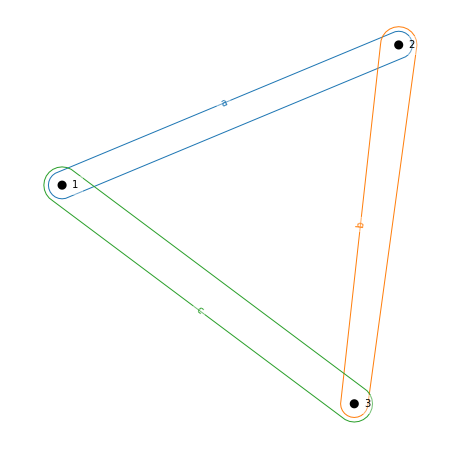

In [17]:
hnx.drawing.rubber_band.draw(H)

In [ ]:
linegraph = H.get_linegraph(1, edges=True, use_nwhy=True)
nx.draw(linegraph,with_labels = True)

In [103]:
entities = []
for articleID in articles_to_commenters:
    entities.append(hnx.Entity(articleID,articles_to_commenters[articleID]))
    
E = hnx.EntitySet('articles_commenters',elements=entities)
H = hnx.Hypergraph(E,static=True)

In [113]:
linegraph = H.get_linegraph(1, edges=True, use_nwhy=True)

In [36]:
# hnx.drawing.rubber_band.draw(H)
# nx.draw(linegraph,with_labels = True)

In [35]:
edges = list(linegraph.edges)
# print(edges[0:1000])

In [ ]:
articles_one_commenter = [167, 1480,2408,1717,414,702]
for i, ID in enumerate(articles_to_commenters):
    if i in articles_one_commenter:
        print(f'article:{ID}, snippet:{articles[ID]["snippet"]}, commenter: {articles_to_commenters[ID]}')

In [18]:
locations = set()
for item in users:    
    place = users[item]['location']
    if ',' in place:
        locations.add(place)
# locations_to_users = {:set({}) for ID in articles}

In [19]:
def containsNumber(value):
    if True in [char.isdigit() for char in value]:
        return True
    return False

In [83]:
print(type(comments))
i = 0
for item in comments:
    print(comments[item])
    i+=1
    if i == 1:
        break

<class 'dict'>
{'approveDate': '1519852022', 'articleID': '5a7101c110f40f00018be961', 'articleWordCount': '1322', 'commentBody': 'I typically strongly dislike articles which bring up such tiny disadvantages to women. But this article I liked. It mentioned, “with many female politicians being replaced by male lawmakers who have pushed for legislation to limit women’s access to abortion,” which would normally tick my non-feminist self off in a regular old article, but I feel as though the beating of their drums are beating a new perspective in my heart. The Bahia group is going against cultural norms by becoming the “first all-female bloco-afro in Brazil” and that problem was certainly not tiny. They are drumming for their rights as women. They are drumming for their rights of their race. This article has influenced me to stand for any matter I want to defend with determination just as these women did in Banda Dida.', 'commentID': '26156416.0', 'commentSequence': '26156416.0', 'commentTi

In [28]:
locations_to_users = {location:set({}) for location in locations}

In [125]:
articleIDs = set()
current_locations = []
for ID in comments:
    articleID = comments[ID]["articleID"]
    split_str = articles[articleID]['keywords'].replace('[','').replace(']','')
    string_array = split_str.split('\',')
    string_array = [s.replace("\'","") for s in string_array]
    if comments[ID]["userLocation"] in locations:
        locations_to_users[comments[ID]["userLocation"]] = locations_to_users[comments[ID]["userLocation"]].union(string_array)
        current_locations.append(comments[ID]["userLocation"])
        

        
    

1


In [126]:
locations_to_topics = locations_to_users
entities_of_location_graph = []
for location in locations_to_topics:
    entities_of_location_graph.append(hnx.Entity(location,locations_to_topics[location]))
    
E = hnx.EntitySet('location_topics',elements=entities_of_location_graph)
H = hnx.Hypergraph(E,static=True)

In [127]:
linegraph = H.get_linegraph(1, edges=True, use_nwhy=True)

In [ ]:
nx.draw(linegraph,with_labels = True)

In [ ]:
linegraph = H.get_linegraph(4, edges=True, use_nwhy=True)

In [128]:
pagerank_location = nx.pagerank_numpy(linegraph)

/var/folders/c9/f87v5c6d4gqc9nymwrlsvg7r0000gn/T/ipykernel_93157/2998398286.py:1: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  pagerank_location = nx.pagerank_numpy(linegraph)
/usr/local/lib/python3.9/site-packages/networkx/algorithms/link_analysis/pagerank_alg.py:354: FutureWarning: google_matrix will return an np.ndarray instead of a np.matrix in
NetworkX version 3.0.
  M = google_matrix(


In [129]:
max_key = max(pagerank_location, key=pagerank_location.get)
print(max_key, pagerank_location[max_key])

9059 0.00020668829363645178


In [113]:
locations_to_users['Santa. Barbara, CA']

{' Census Bureau',
 ' Citizenship and Naturalization',
 ' Commerce Department',
 ' Donald J',
 ' Population',
 ' Redistricting and Reapportionment',
 ' Ross',
 ' Trump',
 ' United States',
 ' United States Politics and Government',
 ' Wilbur L Jr',
 'Census'}

In [110]:
id_to_node_locations = {}
files = os.listdir()
if not "id_to_node_locations.pickle" in files:
    with open('id_to_node_locations.pickle', 'wb') as f:
        print("dumping id_to_node_locations into id_to_node_locations.pickle....")
        pickle.dump(id_to_node_locations, f)
else:
    with open("id_to_node_locations.pickle", "rb") as f:
        print("loaded id_to_node_locations from id_to_node_locations.pickle..")
        id_to_node_locations = pickle.load(f)
print(len(id_to_node_locations))

loaded id_to_node_locations from id_to_node_locations.pickle..
10827


In [112]:
print(id_to_node_locations[9059])

Santa. Barbara, CA


In [37]:
print(pagerank_location)

{0: 0.0001178759730451488, 1: 6.628779738767481e-05, 2: 0.00010683120184190537, 3: 0.00010356280264372759, 4: 5.4252761676519337e-05, 5: 3.060224677326069e-05, 6: 0.00015664641530885488, 7: 4.951333789511622e-05, 8: 0.00010794190625668274, 9: 0.00013206830435984537, 10: 0.000142185876800906, 11: 0.00011123737848089939, 12: 3.12040161614534e-05, 13: 0.00012825491150712483, 14: 2.9694630678616733e-05, 15: 6.768741348859654e-05, 16: 3.12040161614534e-05, 17: 2.0289354690798757e-05, 18: 0.0001027071660155214, 19: 0.00010919067016126824, 20: 0.00011423811178412464, 21: 0.00010782696398753785, 22: 3.12040161614534e-05, 23: 0.00012670964243668094, 24: 0.00012342127379949436, 25: 0.0001726246786842483, 26: 0.00018049305817418183, 27: 0.0001247668550447925, 28: 6.017573248771265e-05, 29: 0.00011273881532105563, 30: 0.00011555060175002102, 31: 0.00011503101801322794, 32: 0.00011042789707128908, 33: 0.0001282762079328648, 34: 0.00010560362721389093, 35: 5.581044617127709e-05, 36: 0.00010929639294

In [99]:
authors = set()
for ID in articles:
    byline = articles[ID]['byline']
    names = byline[3:].lower()
    if ',' or 'and' in names:
        names = set(re.split(', | and ', names))
    authors = authors.union(names)
        
print(len(authors))   

1239


In [100]:
authors_to_users = {author:set({}) for author in authors}

In [102]:
current_locations = []
for ID in comments:
    articleID = comments[ID]["articleID"]
    authors = articles[articleID]['byline']
    authors = set(re.split(', | and ', authors[3:].lower()))
    for author in authors:
        authors_to_users[author].add(comments[ID]["userID"])
print(len(authors_to_users))
        
    

1239


In [103]:
print(type(authors_to_users))
i = 0
for item in authors_to_users:
    print(item)
    print(authors_to_users[item])
    i+=1
    if i == 5:
        break

<class 'dict'>
kirk johnson
{'84284036.0', '28634619.0', '56964821.0', '78816990.0', '63687177.0', '56619099.0', '77165190.0', '76353727.0', '58364898.0', '58301642.0', '83285422.0', '80430829.0', '70193853.0', '30197783.0', '56730875.0', '58207425.0', '47627089.0', '37860033.0', '1032292.0', '77814671.0', '68116818.0', '62248249.0', '74956028.0', '77702857.0', '46579097.0', '18868541.0', '41847830.0', '58631087.0', '65160147.0', '79647278.0', '56283143.0', '58041059.0', '61748246.0', '33213475.0', '74517707.0', '82409470.0', '65881460.0', '68018598.0', '1505842.0', '3965435.0', '74600317.0', '49170989.0', '67267805.0', '47366858.0', '60215558.0', '13920595.0', '37475504.0', '55927526.0', '43571867.0', '51781306.0', '7528497.0', '1498274.0', '69048416.0', '32142703.0', '52521572.0', '59439883.0', '44510280.0', '30551550.0', '321020.0', '76490725.0', '80712076.0', '63433384.0', '55065991.0', '66809837.0', '74928083.0', '54490405.0', '34204226.0', '33339923.0', '68607922.0', '47032511.0'

In [104]:
entities_of_author_graph = []
for author in authors_to_users:
    entities_of_author_graph.append(hnx.Entity(author,authors_to_users[author]))
    
E = hnx.EntitySet('author_users',elements=entities_of_author_graph)
H = hnx.Hypergraph(E,static=True)

In [105]:
linegraph = H.get_linegraph(1, edges=True, use_nwhy=True)

In [106]:
pagerank_authors = nx.pagerank_numpy(linegraph)

/var/folders/c9/f87v5c6d4gqc9nymwrlsvg7r0000gn/T/ipykernel_93157/338152862.py:1: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  pagerank_authors = nx.pagerank_numpy(linegraph)
/usr/local/lib/python3.9/site-packages/networkx/algorithms/link_analysis/pagerank_alg.py:354: FutureWarning: google_matrix will return an np.ndarray instead of a np.matrix in
NetworkX version 3.0.
  M = google_matrix(


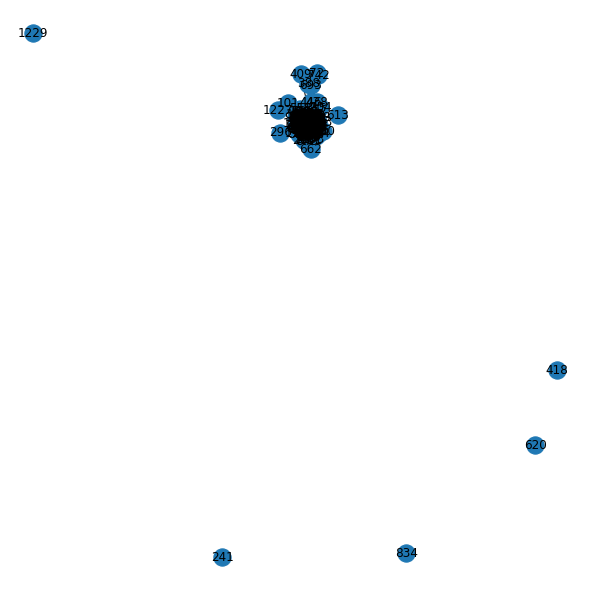

In [109]:
nx.draw(linegraph,with_labels = True)

In [108]:
max_key = max(pagerank_authors, key=pagerank_authors.get)
print(max_key, pagerank_authors[max_key])

1074 0.0016177681170581786


JSONDecodeError: Expecting value: line 1 column 1 (char 0)